In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#data wrangling
df = pd.read_csv('DailyDelhiClimateTest.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [4]:
df.shape

(114, 5)

In [5]:
df=df[["date","humidity"]]
df.head()

,date,humidity
0,2017-01-01,85.869565
1,2017-01-02,77.222222
2,2017-01-03,81.888889
3,2017-01-04,70.050000
4,2017-01-05,74.944444


In [6]:
df['date']= pd.to_datetime(df['date'])
df.head()

,date,humidity
0,2017-01-01,85.869565
1,2017-01-02,77.222222
2,2017-01-03,81.888889
3,2017-01-04,70.050000
4,2017-01-05,74.944444


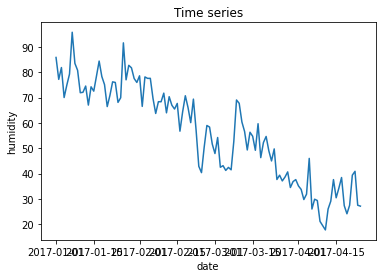

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['date'],df['humidity'])
plt.title('Time series')
plt.xlabel('date')
plt.ylabel('humidity')
plt.show()

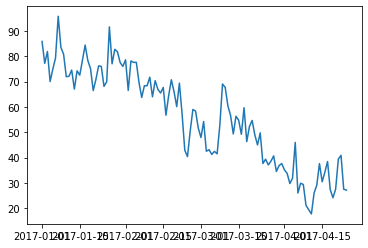

In [11]:
vs=df.groupby("date")["humidity"].sum()
plt.plot(vs)

In [12]:
df["year"]=df["date"].dt.year
df.head()

,date,humidity,year
0,2017-01-01,85.869565,2017
1,2017-01-02,77.222222,2017
2,2017-01-03,81.888889,2017
3,2017-01-04,70.050000,2017
4,2017-01-05,74.944444,2017


In [13]:
df["month"]= df["date"].dt.month
df.head()

,date,humidity,year,month
0,2017-01-01,85.869565,2017,1
1,2017-01-02,77.222222,2017,1
2,2017-01-03,81.888889,2017,1
3,2017-01-04,70.050000,2017,1
4,2017-01-05,74.944444,2017,1


In [14]:
df["Week"]= df["date"].dt.week

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,date,humidity,year,month,Week
0,2017-01-01,85.869565,2017,1,52
1,2017-01-02,77.222222,2017,1,1
2,2017-01-03,81.888889,2017,1,1
3,2017-01-04,70.050000,2017,1,1
4,2017-01-05,74.944444,2017,1,1


In [16]:
from statsmodels.tsa.holtwinters  import ExponentialSmoothing

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
# initialize the model
model=ExponentialSmoothing(endog=vs,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [19]:
model_fit=model.fit(optimized=True)

In [20]:
model_fit.forecast(steps=14)

2017-04-25    29.104836
2017-04-26    28.937328
2017-04-27    28.769821
2017-04-28    28.602313
2017-04-29    28.434806
2017-04-30    28.267298
2017-05-01    28.099790
2017-05-02    27.932283
2017-05-03    27.764775
2017-05-04    27.597267
2017-05-05    27.429760
2017-05-06    27.262252
2017-05-07    27.094745
2017-05-08    26.927237
Freq: D, dtype: float64

In [21]:
df.shape

(114, 5)

In [22]:
ts=df.groupby("date")["humidity"].sum()

In [23]:
ts.head()

date
2017-01-01    85.869565
2017-01-02    77.222222
2017-01-03    81.888889
2017-01-04    70.050000
2017-01-05    74.944444
Name: humidity, dtype: float64

In [24]:
model=ExponentialSmoothing(endog=vs,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [25]:
model_fit=model.fit(optimized=True)

In [26]:
#prediction
model_fit.forecast(steps=10)

2017-04-25    29.104836
2017-04-26    28.937328
2017-04-27    28.769821
2017-04-28    28.602313
2017-04-29    28.434806
2017-04-30    28.267298
2017-05-01    28.099790
2017-05-02    27.932283
2017-05-03    27.764775
2017-05-04    27.597267
Freq: D, dtype: float64

In [27]:
ts.tail(15)

date
2017-04-10    19.428571
2017-04-11    17.750000
2017-04-12    26.000000
2017-04-13    29.111111
2017-04-14    37.625000
2017-04-15    30.444444
2017-04-16    34.250000
2017-04-17    38.444444
2017-04-18    27.333333
2017-04-19    24.125000
2017-04-20    27.500000
2017-04-21    39.375000
2017-04-22    40.900000
2017-04-23    27.500000
2017-04-24    27.142857
Name: humidity, dtype: float64

In [28]:
train_ts=ts[ts.index<"2017-04-15"]

In [29]:
train_ts.tail()

date
2017-04-10    19.428571
2017-04-11    17.750000
2017-04-12    26.000000
2017-04-13    29.111111
2017-04-14    37.625000
Name: humidity, dtype: float64

In [30]:
train_ts.shape

(104,)

In [31]:
test_ts=ts[ts.index>= "2017-04-15"]

In [32]:
test_ts.shape

(10,)

In [33]:
model=ExponentialSmoothing(endog=train_ts,trend="add")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
model_fit=model.fit(optimized=True)

In [35]:
train_ts.shape

(104,)

In [36]:
y_pred=model_fit.forecast(steps=10)

In [37]:
#error finding
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_true=test_ts,y_pred=y_pred)

33.14782179107914